In [10]:
#Importing my Toolbelt for the task

import pandas as pd  # Data manipulation and analysis
from IPython.display import display  # Displaying objects in Jupyter
import requests  # Making HTTP requests
from bs4 import BeautifulSoup  # Web scraping
import random  # Generate random numbers
import time  # Time-related functions
from requests.exceptions import ConnectTimeout, SSLError, RequestException, HTTPError  # Request error handling
from concurrent.futures import ThreadPoolExecutor  # Parallel task execution
from selenium import webdriver  # Web application testing automation
from selenium.webdriver.chrome.options import Options  # Chrome browser options in Selenium
from selenium.common.exceptions import WebDriverException  # Selenium error handling
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Plotting and visualization

In [3]:
#Opening the List of Domains, then loading it into a Dataframe - Think of this like a Spreadsheet!

file_path = "/Users/tylerrogers/Desktop/Solution for Sarah - Madkudu - 20231101/Partnerships List.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')


In [4]:
#Examining the List to make sure it was fully imported and examining the # of records.

print("There are " + str(len(df)) + " records, and " + str(df.iloc[:, 0].nunique()) +" all are unique records. ✅")
print(display(df))


There are 201 records, and 201 all are unique records. ✅


,Domain
0,6clicks.com
1,aetherdigital.io
2,agari.com
3,airsidemobile.com
4,airslate.com
...,...
196,xpansiv.com
197,yellowcard.io
198,yourgiving.co
199,zerto.com


None


In [5]:
# Keywords to search for
keywords = ['trial', 'demo']

In [7]:
# List of User-Agents - Alias to access websites as
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15",
]

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--disable-dev-shm-usage")
chrome_options.add_argument("--no-sandbox")

def check_keywords_in_domain(domain):
    headers = {
        "User-Agent": random.choice(user_agents)
    }
    
    url = f"https://{domain}"
    
    try:
        response = requests.get(url, headers=headers, timeout=30)
        response.raise_for_status()
    except (ConnectTimeout, SSLError):
        url = f"http://{domain}"
        try:
            response = requests.get(url, headers=headers, timeout=30)
            response.raise_for_status()
        except requests.RequestException as e:
            return (False, False, f"Error: {e}")
    except HTTPError as http_err:
        return (False, False, f"HTTP Error: {http_err}")
    except requests.RequestException as e:
        return (False, False, f"Error: {e}")
    
    soup = BeautifulSoup(response.content, 'html.parser')
    page_text = soup.get_text().lower()
    
    has_free_trial = 'trial' in page_text
    has_demo = any(keyword in page_text for keyword in ['demo'])
    
    return (has_free_trial, has_demo, None)

def check_keywords_in_domain_selenium(domain):
    url = f"https://{domain}"
    with webdriver.Chrome(options=chrome_options) as driver:
        try:
            driver.get(url)
            html_content = driver.page_source
            soup = BeautifulSoup(html_content, 'html.parser')
            page_text = soup.get_text().lower()
            has_free_trial = 'trial' in page_text
            has_demo = any(keyword in page_text for keyword in ['demo'])
            return (has_free_trial, has_demo, None)
        except WebDriverException as we:
            return (False, False, f"WebDriver Error: {we}")
        except Exception as e:
            return (False, False, f"Error: {e}")

# Filter out domains that are NOT .com, .net, .org, or .gov
non_standard_domains = df[~df['Domain'].str.endswith(('.com', '.net', '.org', '.gov'))].copy()

# Use ThreadPoolExecutor to parallelize requests for non-standard domains
with ThreadPoolExecutor(max_workers=5) as executor:
    results = list(executor.map(check_keywords_in_domain_selenium, non_standard_domains['Domain']))

non_standard_domains.loc[:, 'Has Free Trial'], non_standard_domains.loc[:, 'Has Demo'], non_standard_domains.loc[:, 'Error Message'] = zip(*results)

# Process standard domains (.com, .net, .org, .gov)
standard_domains = df[df['Domain'].str.endswith(('.com', '.net', '.org', '.gov'))].copy()

with ThreadPoolExecutor(max_workers=10) as executor:
    html_results = list(executor.map(check_keywords_in_domain, standard_domains['Domain']))

standard_domains.loc[:, 'Has Free Trial'], standard_domains.loc[:, 'Has Demo'], standard_domains.loc[:, 'Error Message'] = zip(*html_results)

# Merge the two datasets
merged_df = pd.concat([standard_domains, non_standard_domains], ignore_index=True)

# Display the DataFrame
pd.set_option('display.max_rows', None)
display(merged_df)



,Domain,Has Free Trial,Has Demo,Error Message
0,6clicks.com,False,True,None
1,agari.com,False,True,None
2,airsidemobile.com,False,True,None
3,airslate.com,False,True,None
4,airtasker.com,False,False,None
5,allocade.com,False,False,"Error: HTTPConnectionPool(host='allocade.com',..."
6,alphahealth.com,False,False,Error: HTTPSConnectionPool(host='alphahealth.c...
7,altair-semi.com,True,False,None
8,andigital.com,False,False,None
9,apromore.com,True,True,None


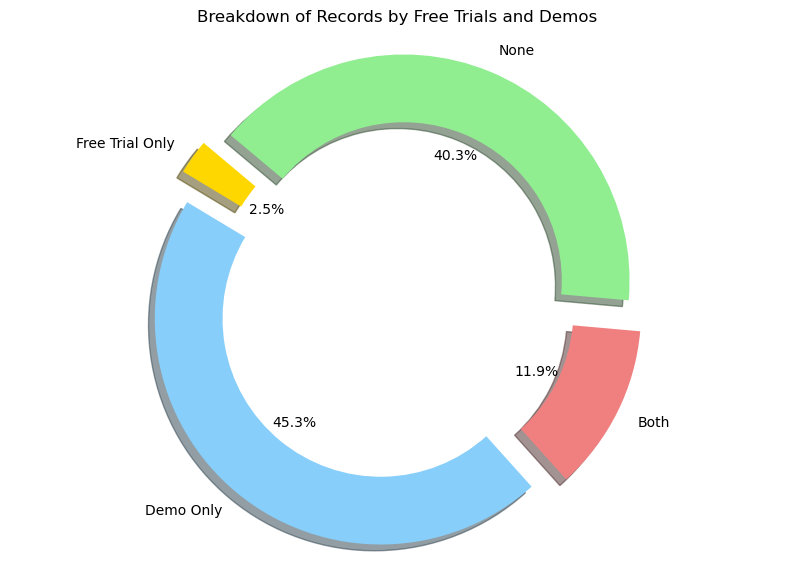

In [9]:
# Adjusting the donut chart to include records where both "Free Trial" and "Demo" are False

# Export Results to Excel

merged_df.to_excel("webscrape_results.xlsx")

# Counting records for each category
free_trial_only = merged_df[(merged_df['Has Free Trial'] == True) & (merged_df['Has Demo'] == False)].shape[0]
demo_only = merged_df[(merged_df['Has Free Trial'] == False) & (merged_df['Has Demo'] == True)].shape[0]
both = merged_df[(merged_df['Has Free Trial'] == True) & (merged_df['Has Demo'] == True)].shape[0]
none = merged_df[(merged_df['Has Free Trial'] == False) & (merged_df['Has Demo'] == False)].shape[0]

# Data to plot
labels = 'Free Trial Only', 'Demo Only', 'Both', 'None'
sizes = [free_trial_only, demo_only, both, none]
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen']
explode = (0.1, 0.1, 0.1, 0.1)  # explode all slices

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140, wedgeprops=dict(width=0.3))

plt.axis('equal')
plt.title("Breakdown of Records by Free Trials and Demos")
plt.show()